In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
import pandas as pd
import numpy as np

In [92]:
data=pd.read_csv(r"/content/drive/MyDrive/SmartInternz ML Project/daily_csv.csv")

In [93]:
data.head(10)

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00
5,1997-01-14,4.01
6,1997-01-15,4.34
7,1997-01-16,4.71
8,1997-01-17,3.91
9,1997-01-20,3.26


In [94]:
data.shape

(5938, 2)

In [95]:
data.dtypes

Date      object
Price    float64
dtype: object

In [96]:
data.min()

Date     1997-01-07
Price          1.05
dtype: object

# PreProcessing

In [97]:
data.isnull().any()

Date     False
Price     True
dtype: bool

In [98]:
mean_Price=data['Price'].mean()

In [99]:
data['Price'].fillna(value=mean_Price,inplace=True)

In [100]:
data.isnull().any()

Date     False
Price    False
dtype: bool

In [101]:
data[data.duplicated()].any()

Date     False
Price    False
dtype: bool

# Datetime Preprocessing

In [102]:
from datetime import datetime

In [103]:
data['Date']=pd.to_datetime(data.Date,format='%Y-%m-%d')
data.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [104]:
data['year']=data['Date'].dt.year
data['month']=data['Date'].dt.month
data['day']=data['Date'].dt.day

In [105]:
data['date']=(data['year']*100+data['month'])*100+data['day']

# Visualizations

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Date', ylabel='Price'>

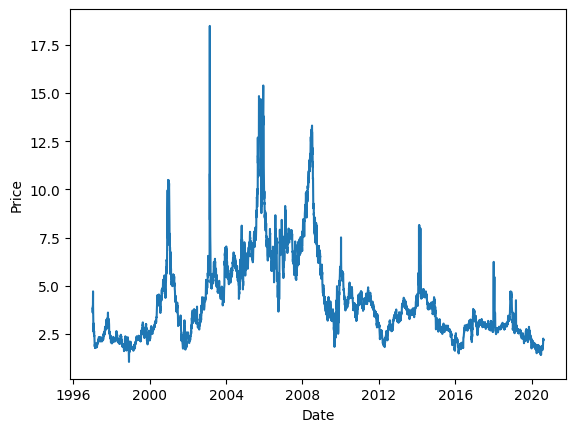

In [107]:
sns.lineplot(x='Date',y='Price',data=data)

In [108]:
plot_data=data[["date","Price"]]

<Axes: >

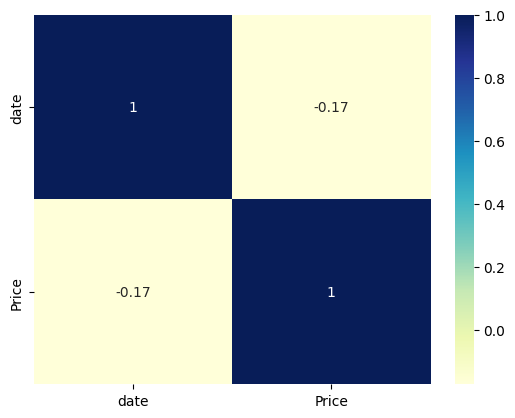

In [109]:
sns.heatmap(plot_data.corr(),cmap='YlGnBu',annot=True)

# Splitting

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X=data['date']
y=data['Price']

In [112]:
X_std=data['date']

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=24)

In [114]:
print(X_train.shape)
print(X_test.shape)

(5344,)
(594,)


In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
std=StandardScaler()
X_train_std=std.fit_transform(np.array(X_train).reshape(-1,1))
X_test_std=std.fit_transform(np.array(X_test).reshape(-1,1))

# Model Linear

In [117]:
from sklearn.linear_model import LinearRegression
model_linear=LinearRegression()

In [118]:
model_linear.fit(np.array(X_train).reshape(-1,1),y_train)

LinearRegression()

In [119]:
preds_linear=model_linear.predict(np.array(X_test).reshape(-1,1))

In [150]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import math
print("RMSE:",math.sqrt(mean_squared_error(y_test,preds_linear)))
print("R-squared:",r2_score(y_test,preds_linear))
print("MAE: ",mean_absolute_error(y_test,preds_linear))

RMSE: 2.4515378893368927
R-squared: 0.030521956108282455
MAE:  1.72666287053704


# Model Forest Regressor

In [121]:
from sklearn.ensemble import RandomForestRegressor

In [122]:
model_forest=RandomForestRegressor(max_depth=2,random_state=100)

In [123]:
model_forest.fit(np.array(X_train).reshape(-1,1),y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [124]:
preds_forest=model_forest.predict(np.array(X_test).reshape(-1,1))

In [151]:
print("RMSE:",math.sqrt(mean_squared_error(y_test,preds_forest)))
print("R-squared:",r2_score(y_test,preds_forest))
print("MAE: ",mean_absolute_error(y_test,preds_forest))

RMSE: 1.8360794523257309
R-squared: 0.4561943704639124
MAE:  1.1605551093847126


# HyperParameter Tuning

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
parameters={
    'n_estimators':[100,200,250,300],
    'max_depth':[2,6,8]
}
clf = GridSearchCV(RandomForestRegressor(), param_grid=parameters,verbose=2)

clf.fit(np.array(X_train).reshape(-1,1),y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.4s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.4s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.4s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.5s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.4s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.5s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.4s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.4s
[CV] END ......................max_depth=2, n_estimators=250; total time=   0.5s
[CV] END ......................max_depth=2, n_es

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 6, 8],
                         'n_estimators': [100, 200, 250, 300]},
             verbose=2)

In [128]:
clf.best_score_

0.967361541108318

In [129]:
clf.best_params_

{'max_depth': 8, 'n_estimators': 300}

In [145]:
ideal_model=RandomForestRegressor(max_depth=8,n_estimators=300)

In [146]:
ideal_model.fit(np.array(X_train).reshape(-1,1),y_train)

RandomForestRegressor(max_depth=8, n_estimators=300)

In [147]:
preds_ideal=ideal_model.predict(np.array(X_test).reshape(-1,1))

In [148]:
print("RMSE:",math.sqrt(mean_squared_error(y_test,preds_ideal)))
print("R-squared:",r2_score(y_test,preds_ideal))

RMSE: 0.5803907961476629
R-squared: 0.9456622324195042


In [149]:
ideal_model.predict(np.array(20201230).reshape(-1,1))

array([2.16810278])

# STANDARDIZATION

In [135]:
ideal_model=RandomForestRegressor(max_depth=8,n_estimators=100)

In [136]:
from sklearn.model_selection import GridSearchCV

In [137]:
parameters={
    'n_estimators':[100,200,250,300],
    'max_depth':[2,6,8]
}
clf = GridSearchCV(RandomForestRegressor(), param_grid=parameters,verbose=2)

clf.fit(X_train_std,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.4s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.5s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.4s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.5s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.4s
[CV] END ......................max_depth=2, n_estimators=250; total time=   0.6s
[CV] END ......................max_depth=2, n_es

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 6, 8],
                         'n_estimators': [100, 200, 250, 300]},
             verbose=2)

In [138]:
clf.best_score_

0.9676940695862966

In [139]:
clf.best_params_

{'max_depth': 8, 'n_estimators': 200}

In [140]:
ideal_model=RandomForestRegressor(max_depth=8,n_estimators=250)

In [141]:
ideal_model.fit(X_train_std,y_train)

RandomForestRegressor(max_depth=8, n_estimators=250)

In [142]:
preds_ideal=ideal_model.predict(X_test_std)

In [143]:
print("RMSE:",math.sqrt(mean_squared_error(y_test,preds_ideal)))
print("R-squared:",r2_score(y_test,preds_ideal))

RMSE: 1.5207951804021387
R-squared: 0.6269197893069173


# Saving Model

In [144]:
# from joblib import Parallel, delayed
# import joblib


# # Save the model as a pickle in a file
# joblib.dump(ideal_model, 'Model.pkl')